## Motivation

### What is your dataset?
Our main dataset is called MovieLens Dataset (consists of movies released on or before July 2017). It's 33 MB, including 45572 rows (That is to say, it includes data for a total of 45,572 movies), 24 variables. We also introduce several other related dataset like rating, keywords and credits for reference. The total size of all data is approximately 900 MB.


### Why did you choose this/these particular dataset(s)?
The history of the film industry dates back to the late 19th century when it emerged as a novel form of artistic expression. The Lumière Brothers' commercial film screening in Paris in 1895 marked the beginning of commercialization in cinema. Over the decades, the industry evolved through silent films, the advent of sound in the late 1920s, and the introduction of color in the 1930s, culminating in the digital revolution of the late 20th and early 21st centuries.

The silent film era, from the late 1890s to the early 1920s, saw the emergence of iconic works such as "The Great Train Robbery" and "Metropolis," laying the foundation for cinematic language and storytelling techniques. The transition to sound films revolutionized the medium, with classics like "Gone with the Wind" and "The Wizard of Oz" showcasing the power of dialogue and sound effects to enhance storytelling. The subsequent adoption of color further enriched cinematic expression, with films like "The Wizard of Oz" and "Citizen Kane" showcasing the vibrant possibilities of color cinematography.

With the advent of digital technology, the film industry underwent a seismic shift, enabling unprecedented creativity in visual effects and post-production. From blockbusters like "Titanic" and "Avatar" to independent gems like "Boyhood" and "Moonlight," cinema continues to captivate global audiences, transcending boundaries of culture and geography. Today, the film industry thrives on innovation, diversity, and global collaboration, reflecting humanity's endless capacity for imagination and storytelling.

## Basic stats

### Write about your choices in data cleaning and preprocessing
First, we should take a look at our dataset and find out what are we interested in, what is worth analyzing, and what do we not need.

In [76]:
%matplotlib inline
from IPython.display import Image, HTML
import json
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
from wordcloud import WordCloud, STOPWORDS
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import chart_studio.tools
import warnings
from wordcloud import STOPWORDS
from collections import defaultdict
import re
import ast
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)

word_weights = defaultdict(float)
enhanced_stopwords = STOPWORDS.copy()
enhanced_stopwords.update([str(i) for i in range(10)])
enhanced_stopwords.update([chr(i) for i in range(65, 91)]) 
enhanced_stopwords.update([chr(i) for i in range(97, 123)]) 

In [185]:
df = pd.read_csv('movies.csv')
df_original = pd.read_csv('movies.csv')
movie_data = pd.read_csv('cleaned_movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

We can see that our main dataset contains 24 columns, which are listed below:

1. **adult** (`object`): Indicates whether the movie is intended for adults (e.g., `False`).
2. **belongs_to_collection** (`object`): Contains information about the movie's collection if it belongs to one, in JSON-like format (e.g., `{'id': 10194, 'name': 'Toy Story Collection'}`).
3. **budget** (`object`): The production budget of the movie, stored as a string due to mixed data types (e.g., `30000000`).
4. **genres** (`object`): List of genres for the movie in JSON-like format (e.g., `"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]"`).
5. **homepage** (`object`): The movie's official website (e.g., `http://toystory.disney.com/toy-story`).
6. **id** (`object`): Unique identifier for the movie (e.g., `862`).
7. **imdb_id** (`object`): The movie's IMDb identifier (e.g., `tt0114709`).
8. **original_language** (`object`): ISO 639-1 code for the original language of the movie (e.g., `en` for English).
9. **original_title** (`object`): The original title of the movie (e.g., `Toy Story`).
10. **overview** (`object`): A brief synopsis or summary of the movie (e.g., `Led by Woody, Andy's toys live happily...`).
11. **popularity** (`object`): Popularity score as a string due to mixed data types (e.g., `21.946943`).
12. **poster_path** (`object`): Path to the movie's poster image (e.g., `/rhIRbceoE9lR4veEXuwCC2wARtG.jpg`).
13. **production_companies** (`object`): List of production companies in JSON-like format (e.g., `"[{'name': 'Pixar Animation Studios', 'id': 3}]"`).
14. **production_countries** (`object`): List of production countries in JSON-like format (e.g., `"[{'iso_3166_1': 'US', 'name': 'United States of America'}]"`).
15. **release_date** (`object`): Release date of the movie (e.g., `1995-10-30`).
16. **revenue** (`float64`): Box office revenue generated by the movie (e.g., `373554033.0`).
17. **runtime** (`float64`): Duration of the movie in minutes (e.g., `81.0`).
18. **spoken_languages** (`object`): List of spoken languages in JSON-like format (e.g., `"[{'iso_639_1': 'en', 'name': 'English'}]"`).
19. **status** (`object`): Current status of the movie (e.g., `Released`).
20. **tagline** (`object`): A tagline or catchphrase for the movie (e.g., `Just When His World Is Back To Normal...`).
21. **title** (`object`): The title of the movie (e.g., `Toy Story`).
22. **video** (`object`): Indicates if there is a related video (e.g., `False`).
23. **vote_average** (`float64`): Average user rating for the movie (e.g., `7.7`).
24. **vote_count** (`float64`): Number of votes the movie received (e.g., `5415.0`).

It's obvious that some of them are pretty useless to us and let us start by removing these features. There are a lot of things we don't care about in our dataset, such as whether or not it's adult content (and the fact that very few films are labelled as such).

In [78]:
df = df.drop('original_title', axis=1)
df = df.drop(['imdb_id'], axis=1)
df = df.drop(['homepage'], axis=1)
df = df.drop(['id'], axis=1)

We then need to consider a number of issues, for the main objective we are looking at, we need to filter out non-zero values to ensure that the data makes sense.

In [79]:
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')

df = df.dropna(subset=['revenue', 'budget'])
df = df[(df['revenue'] > 0) & (df['budget'] > 0)]

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5381 entries, 0 to 45422
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  5381 non-null   object 
 1   belongs_to_collection  1224 non-null   object 
 2   budget                 5381 non-null   float64
 3   genres                 5381 non-null   object 
 4   original_language      5381 non-null   object 
 5   overview               5370 non-null   object 
 6   popularity             5381 non-null   object 
 7   poster_path            5381 non-null   object 
 8   production_companies   5381 non-null   object 
 9   production_countries   5381 non-null   object 
 10  release_date           5381 non-null   object 
 11  revenue                5381 non-null   float64
 12  runtime                5380 non-null   float64
 13  spoken_languages       5381 non-null   object 
 14  status                 5381 non-null   object 
 15  tagline 

As we can see, we have over 5,000 rows of data with non-null or zero revenue and budget. This may not seem like a large sample size, about 10% of our entire dataset, but it's enough for us to do some analysis.

Next, we are going to consider adding a new quantity for the ratio of box office to cost. This coefficient we use to measure the success of a film in terms of commercial returns. We call it return_rate.

In [81]:
df['return_rate'] = df['revenue'] / df['budget']
df[df['return_rate'].isnull()].shape

(0, 21)

## Data Analysis

### Describe your data analysis and explain what you've learned about the dataset.


#### Title and Overview

Do certain words appear more frequently in movie titles and descriptions? It seems likely that some words are deemed more impactful and suitable for a title. Let's investigate this further!

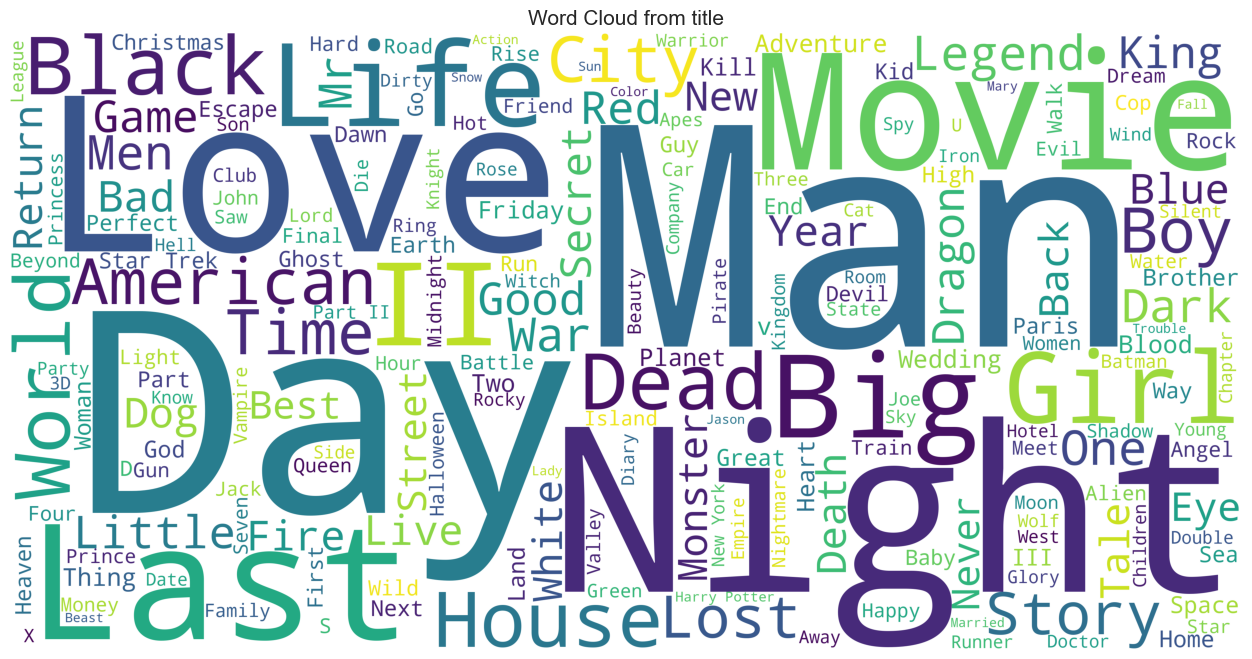

In [82]:
df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype('str')

title_corpus = ' '.join(df['title'])
overview_corpus = ' '.join(df['overview'])

title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.title(f'Word Cloud from {'title'}')
plt.axis('off')
plt.show()


The word **Man** and **Day** tops the list of most frequently used words in movie titles, followed by **Night**, **Love**, and **MOvie**. This trend underscores the pervasive theme of daily life in movies.

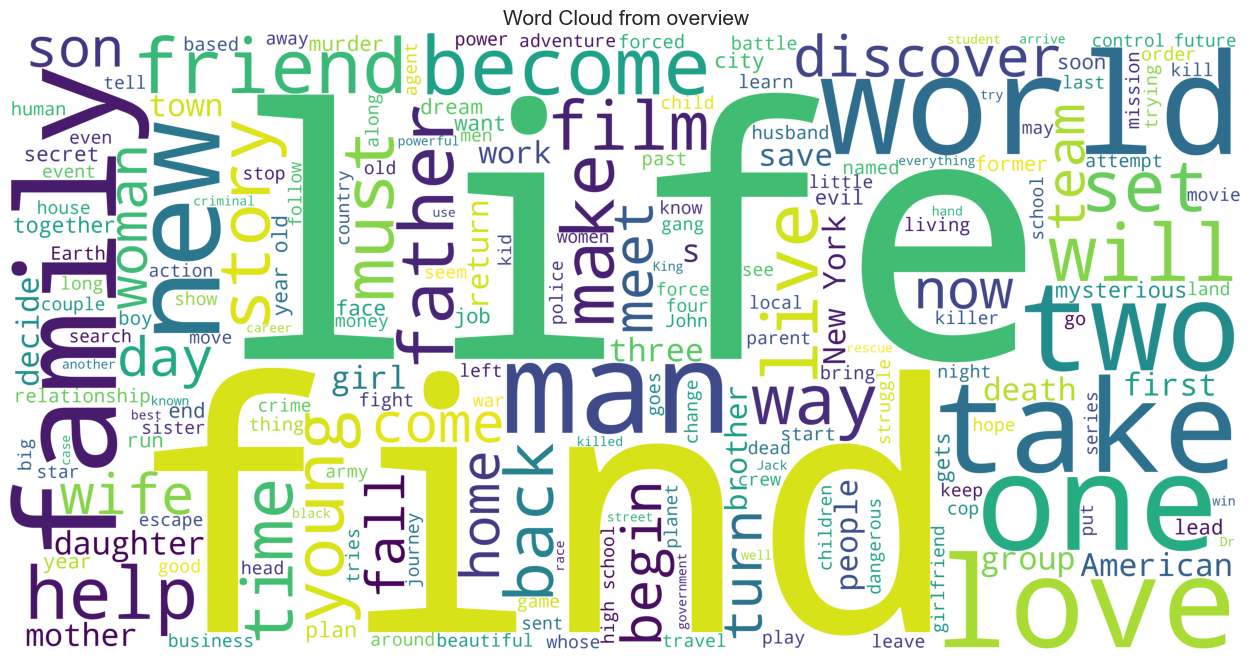

In [83]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.title(f'Word Cloud from {'overview'}')
plt.axis('off')
plt.show()

We can see **Life** and **Find** are popular in Movie Blurbs. Together with **World**, **Family** and **Love**, these wordclouds give us a pretty good idea of the most popular themes present in movies. 

#### Getting deeper to Title and Overview

Above is just a summary of the overall data. Now we're moving on to a more interesting part. To intuitively reflect the possible relationship between movie financial performance and titles, we will weight each word in the movie title by its cost and create a new chart like this.

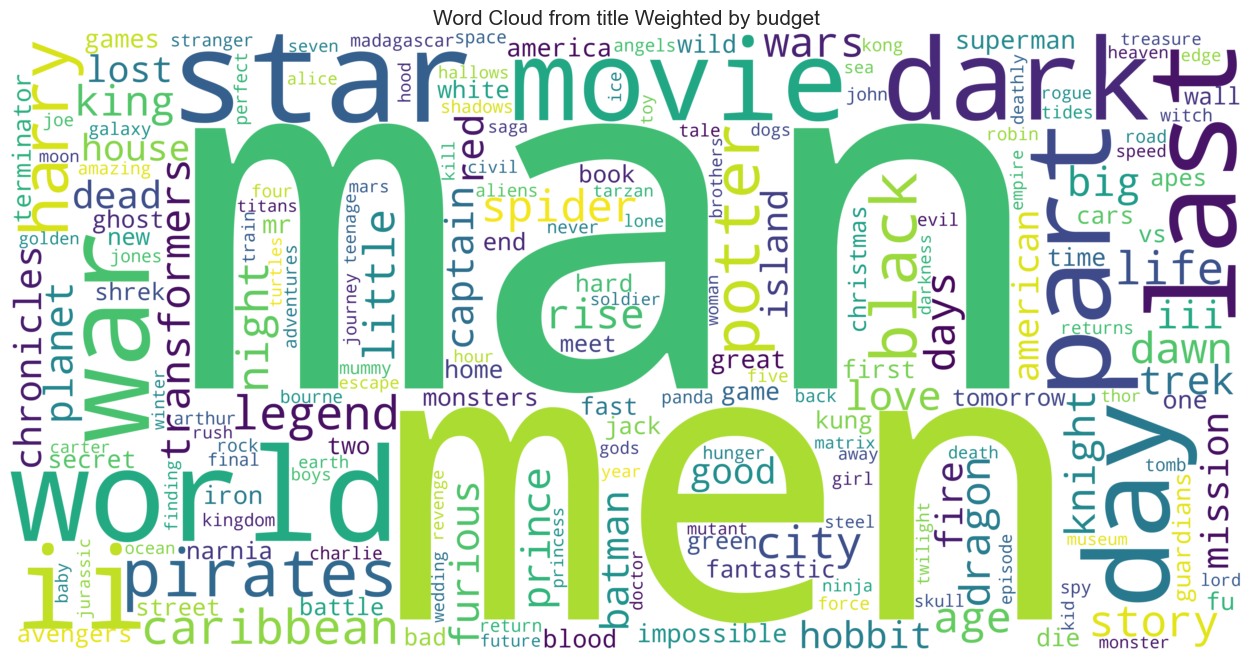

In [84]:
for _, row in df.iterrows():
    words = re.findall(r'\w+', row['title'].lower())
        
    for word in words:
        if word not in enhanced_stopwords and len(word) > 1: 
            word_weights[word] += row['budget']

wordcloud = WordCloud(stopwords=enhanced_stopwords, background_color='white', height=2000, width=4000).generate_from_frequencies(word_weights)
    
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud from {'title'} Weighted by {'budget'}')
plt.show()

Text(0.5, 1.0, 'Word Cloud from title Weighted by revenue')

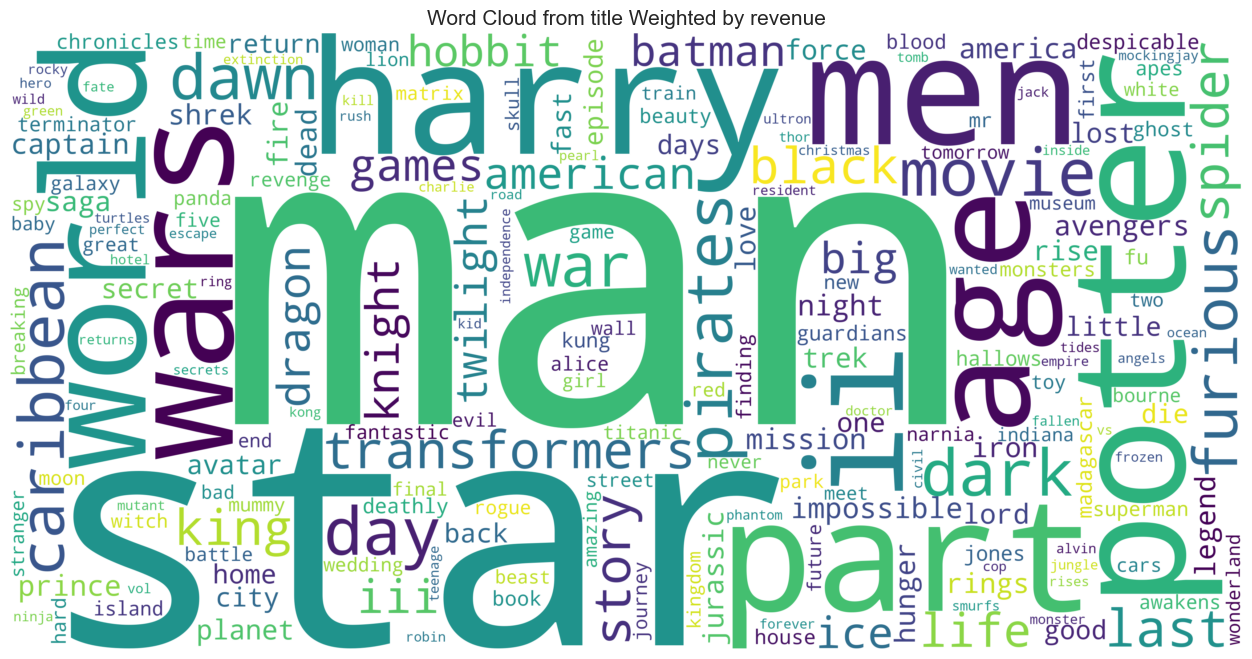

In [85]:
for _, row in df.iterrows():
    words = re.findall(r'\w+', row['title'].lower())
        
    for word in words:
        if word not in enhanced_stopwords and len(word) > 1: 
            word_weights[word] += row['revenue']

wordcloud = WordCloud(stopwords=enhanced_stopwords, background_color='white', height=2000, width=4000).generate_from_frequencies(word_weights)
    
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud from {'title'} Weighted by {'revenue'}')

Text(0.5, 1.0, 'Word Cloud from title Weighted by return_rate')

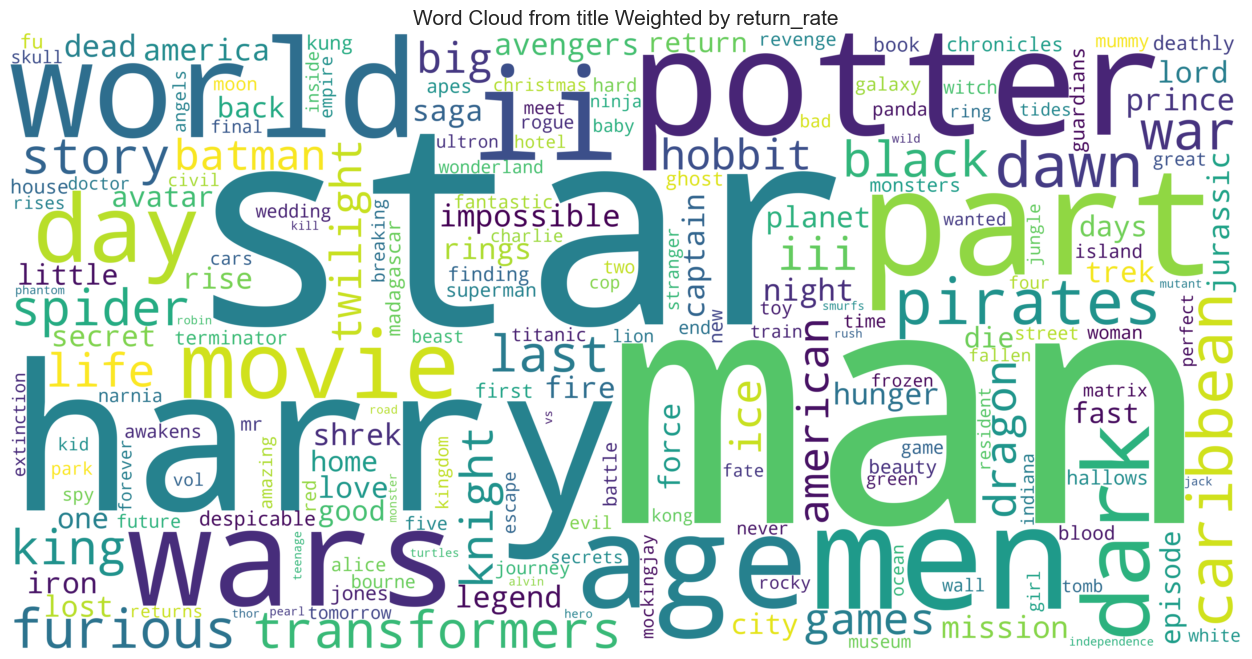

In [86]:
for _, row in df.iterrows():
    words = re.findall(r'\w+', row['title'].lower())
        
    for word in words:
        if word not in enhanced_stopwords and len(word) > 1: 
            word_weights[word] += row['return_rate']

wordcloud = WordCloud(stopwords=enhanced_stopwords, background_color='white', height=2000, width=4000).generate_from_frequencies(word_weights)
    
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud from {'title'} Weighted by {'return_rate'}')

Surprisingly, possibly contrary to the real world, **man** and **men** spent more money if they appear in a movie title. 

And accordingly **man** also makes a lot of money along with the word **star**. I think this makes sense, given that Star Wars is an extremely successful series with many installments. 

As for the return rate, aside from **man** and **star**, it's hard not to notice the words **Harry** and **Potter**, as very few other movies would include these two words. This further confirms the immense commercial success of Harry Potter, which could be one of the most successful movie series in history. Is that the case? Please be patient, we'll reveal more to you later..

Then we are about to talk about the overview of movie. What kind of plot or theme is more appealing? What kind of theme might lead to a movie's failure? Let's explore that now.

Text(0.5, 1.0, 'Word Cloud from overview Weighted by budget')

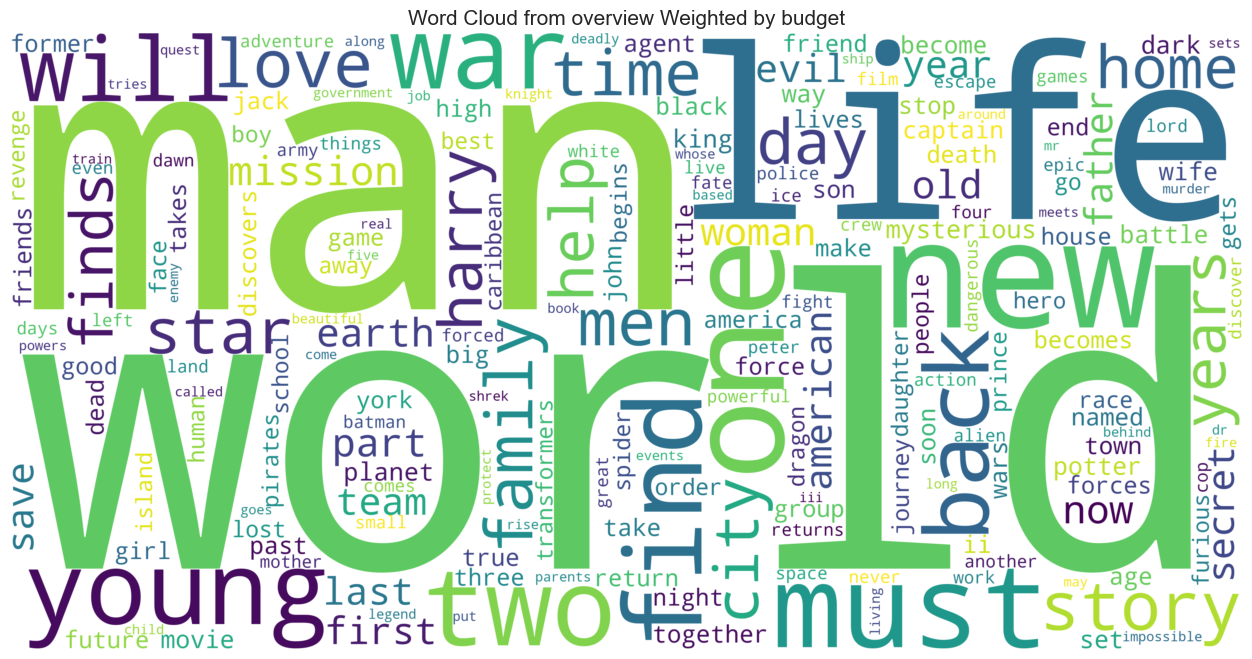

In [87]:
for _, row in df.iterrows():
    words = re.findall(r'\w+', row['overview'].lower())
        
    for word in words:
        if word not in enhanced_stopwords and len(word) > 1: 
            word_weights[word] += row['budget']

wordcloud = WordCloud(stopwords=enhanced_stopwords, background_color='white', height=2000, width=4000).generate_from_frequencies(word_weights)
    
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud from {'overview'} Weighted by {'budget'}')

Text(0.5, 1.0, 'Word Cloud from overview Weighted by revenue')

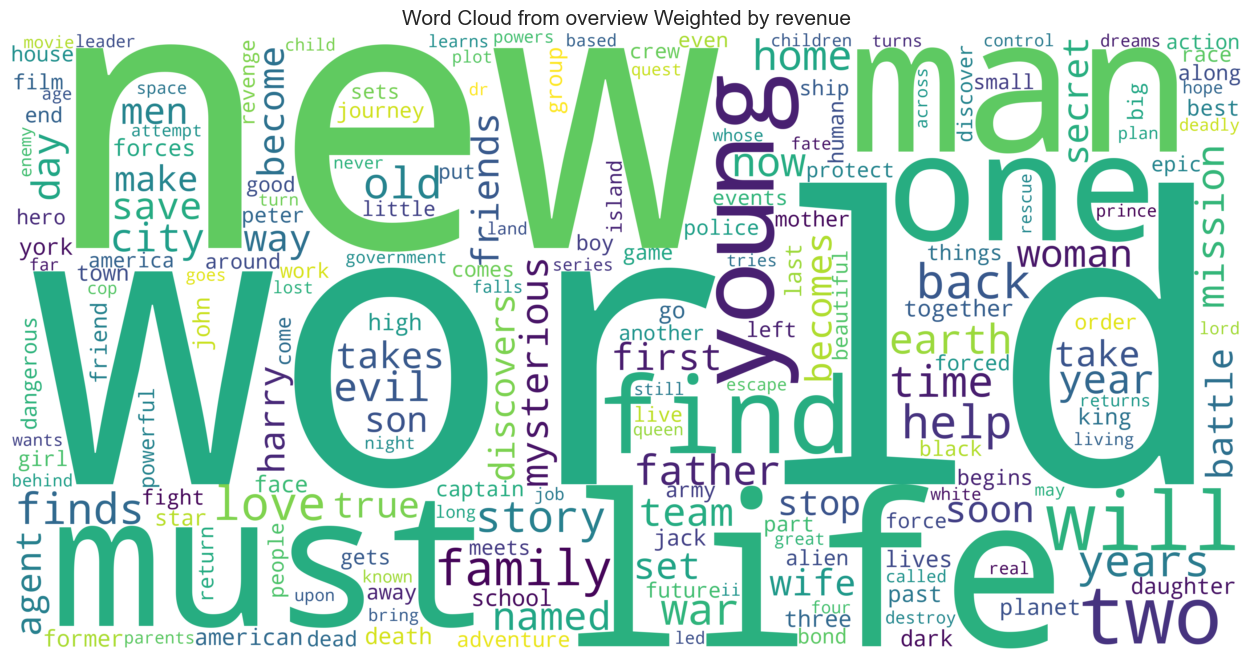

In [88]:
for _, row in df.iterrows():
    words = re.findall(r'\w+', row['overview'].lower())
        
    for word in words:
        if word not in enhanced_stopwords and len(word) > 1: 
            word_weights[word] += row['revenue']

wordcloud = WordCloud(stopwords=enhanced_stopwords, background_color='white', height=2000, width=4000).generate_from_frequencies(word_weights)
    
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud from {'overview'} Weighted by {'revenue'}')

Text(0.5, 1.0, 'Word Cloud from overview Weighted by return_rate')

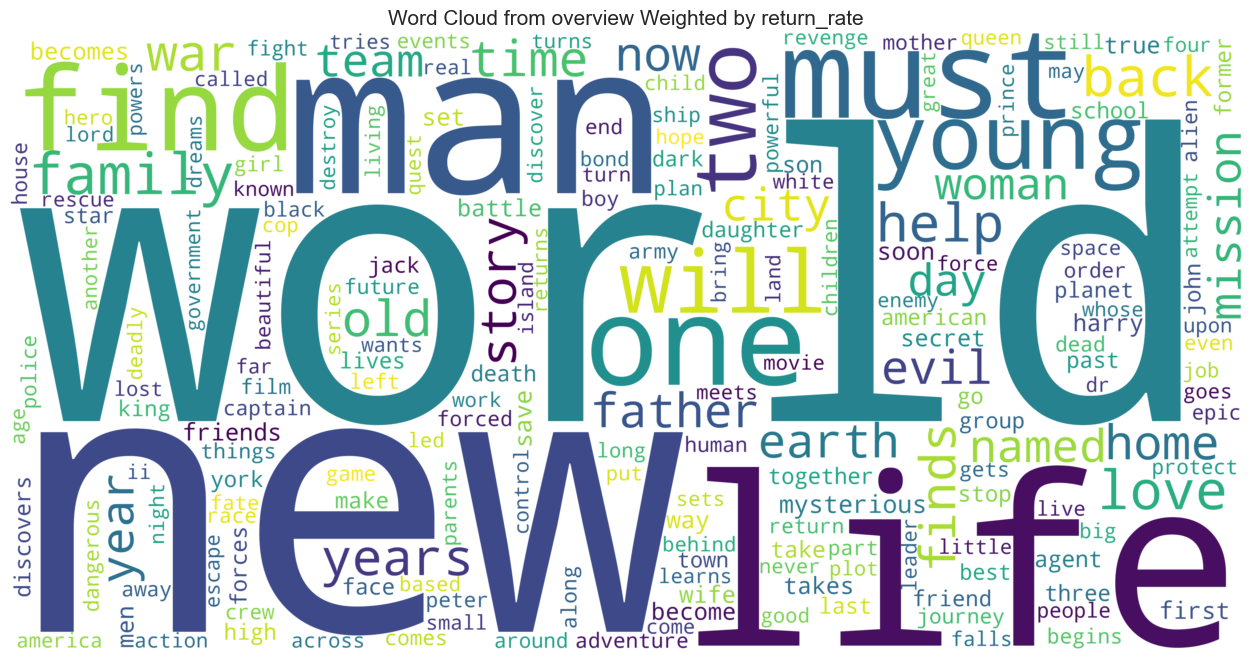

In [89]:
for _, row in df.iterrows():
    words = re.findall(r'\w+', row['overview'].lower())
        
    for word in words:
        if word not in enhanced_stopwords and len(word) > 1: 
            word_weights[word] += row['return_rate']

wordcloud = WordCloud(stopwords=enhanced_stopwords, background_color='white', height=2000, width=4000).generate_from_frequencies(word_weights)
    
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud from {'overview'} Weighted by {'return_rate'}')

In terms of the overview, we can clearly see the words **world** and **man**, which might indicate that most high-budget movies are filmed with a grand theme or focus on a specific character. 

The same applies to movies with high box office revenue, but from the other two words **new** and **life**, we can also recognize that audiences are more looking forward to new things and life-related themes.

The return on investment also shows us that grand perspective, novelty, and life story are likely essential elements in making a movie more successful according to the same three words.

#### Regional Characteristics of Movies

In [90]:
df['production_countries'] = df['production_countries'].fillna(
    '[]').apply(ast.literal_eval)
df['production_countries'] = df['production_countries'].apply(
    lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
s = df.apply(lambda x: pd.Series(x['production_countries']), axis=1).stack(
).reset_index(level=1, drop=True)
s.name = 'countries'
con_df = df.drop('production_countries', axis=1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']
con_df = con_df.reset_index(drop=True)
con_df.columns = ['num_movies', 'country']
con_df.head(10)

num_movies                   country
0        4385  United States of America
1         666            United Kingdom
2         369                    France
3         318                   Germany
4         235                    Canada
5         182                     India
6         120                 Australia
7         112                     Italy
8          88                     Japan
9          85                    Russia

In [91]:
df['spoken_languages'] = df['spoken_languages'].fillna(
    '[]').apply(ast.literal_eval)

df['spoken_languages'] = df['spoken_languages'].apply(
    lambda x: [i['name'] for i in x] if isinstance(x, list) else []
)

s = df.apply(lambda x: pd.Series(x['spoken_languages']), axis=1).stack(
).reset_index(level=1, drop=True)
s.name = 'language'

con_df = df.drop('spoken_languages', axis=1).join(s)

lang_count_df = pd.DataFrame(con_df['language'].value_counts()).reset_index()
lang_count_df.columns = ['language', 'num_movies']
lang_count_df = lang_count_df.reset_index(drop=True)
lang_count_df.head(10)

language  num_movies
0   English        4876
1  Français         486
2   Español         419
3   Deutsch         294
4   Pусский         278
5  Italiano         239
6       日本語         132
7    हिन्दी         131
8       普通话         120
9                    92

Unsurprisingly, the majority of movies in our existing data are produced in the United States and speaking english, nearly 80% of our total data. But are American movies definitely the most profitable? Which country's movies have the highest cost-effectiveness and returns? We will explore this next.

In [135]:
df_original = pd.read_csv('movies.csv')

df_original['revenue'] = pd.to_numeric(df_original['revenue'], errors='coerce')
df_original['budget'] = pd.to_numeric(df_original['budget'], errors='coerce')
df_original['return_rate'] = df_original['revenue'] / df_original['budget']
df_original[df_original['return_rate'].isnull()].shape

def safe_json_loads(x):
    try:
        return json.loads(x.replace("'", "\""))
    except json.JSONDecodeError:
        return []

df_original['production_countries'] = df_original['production_countries'].apply(lambda x: safe_json_loads(x) if pd.notna(x) else [])

expanded_movies_df = df_original.explode('production_countries')

expanded_movies_df['country'] = expanded_movies_df['production_countries'].apply(lambda x: x['name'] if isinstance(x, dict) else None)

country_stats = expanded_movies_df.groupby('country').agg(
    average_revenue=('revenue', 'mean'),
    average_budget=('budget', 'mean'),
    average_return_rate=('return_rate', 'mean'),
    movie_count=('id', 'count')
)

filtered_country_stats = country_stats[country_stats['movie_count'] >= 500]

sorted_country_stats_revenue = filtered_country_stats.sort_values(by='average_revenue', ascending=False).reset_index()
sorted_country_stats_budget = filtered_country_stats.sort_values(by='average_budget', ascending=False).reset_index()
sorted_country_stats_return_rate = filtered_country_stats.sort_values(by='average_return_rate', ascending=False).reset_index()


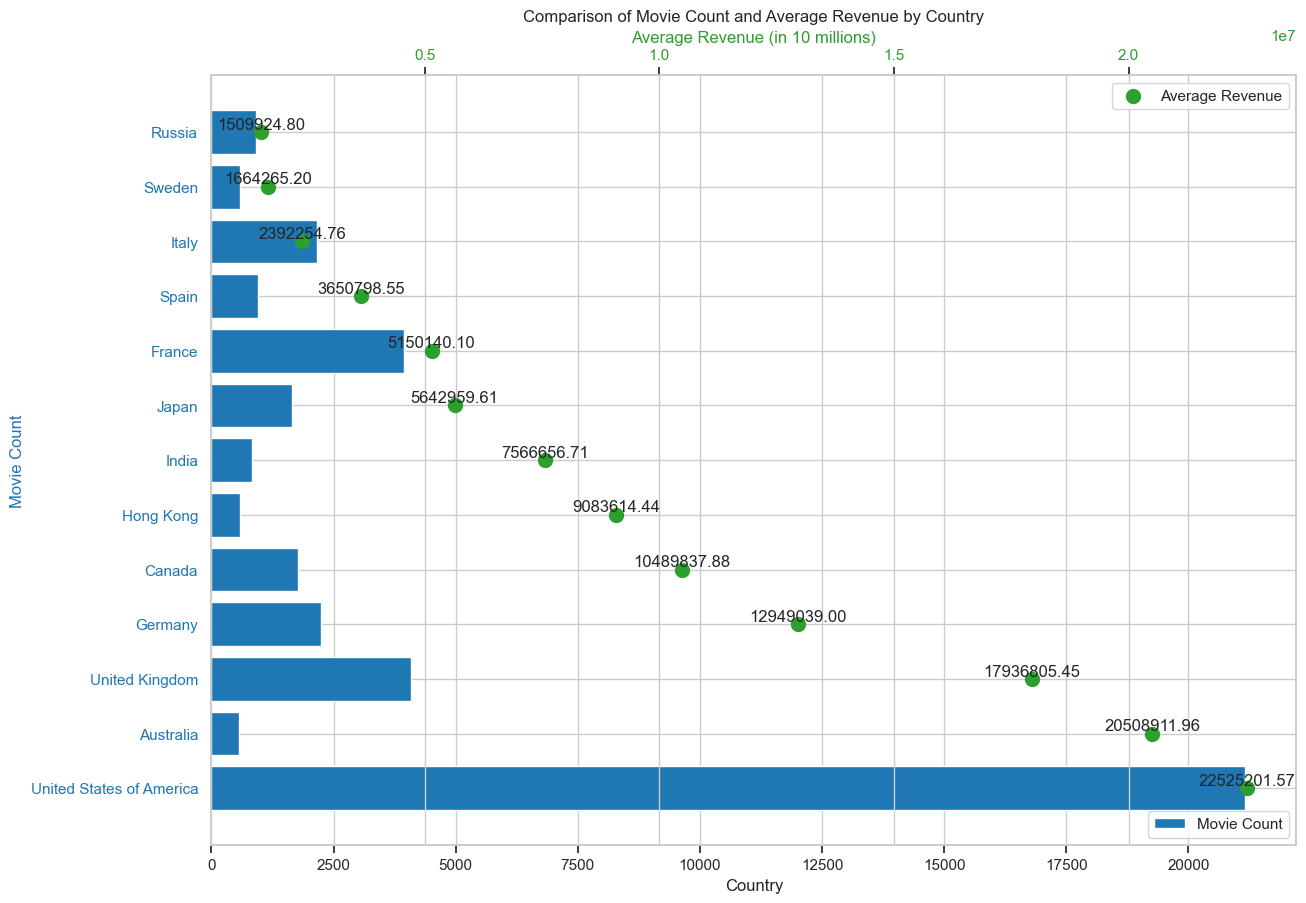

In [145]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 10))

# Set up the bar plot for movie counts
color = 'tab:blue'
ax1.set_xlabel('Country')
ax1.set_ylabel('Movie Count', color=color)
bars = ax1.barh(sorted_country_stats_revenue['country'], sorted_country_stats_revenue['movie_count'], color=color, label='Movie Count')
ax1.tick_params(axis='y', labelcolor=color)

# Set up the scatter plot for average revenue
ax2 = ax1.twiny()
color = 'tab:green'
ax2.set_xlabel('Average Revenue (in 10 millions)', color=color)
scatter = ax2.scatter(sorted_country_stats_revenue['average_revenue'], sorted_country_stats_revenue['country'], color=color, label='Average Revenue', s=100)
ax2.tick_params(axis='x', labelcolor=color)

# Add average revenue as text above the scatter points
for i, (avg_revenue, country) in enumerate(zip(sorted_country_stats_revenue['average_revenue'], sorted_country_stats_revenue['country'])):
    ax2.text(avg_revenue, 
             country, 
             f'{avg_revenue:.2f}', 
             va='bottom', 
             ha='center')

# Update legends
ax1.legend([bars], ['Movie Count'], loc='lower right')
ax2.legend(['Average Revenue'], loc='upper right')

plt.title('Comparison of Movie Count and Average Revenue by Country')
plt.show()


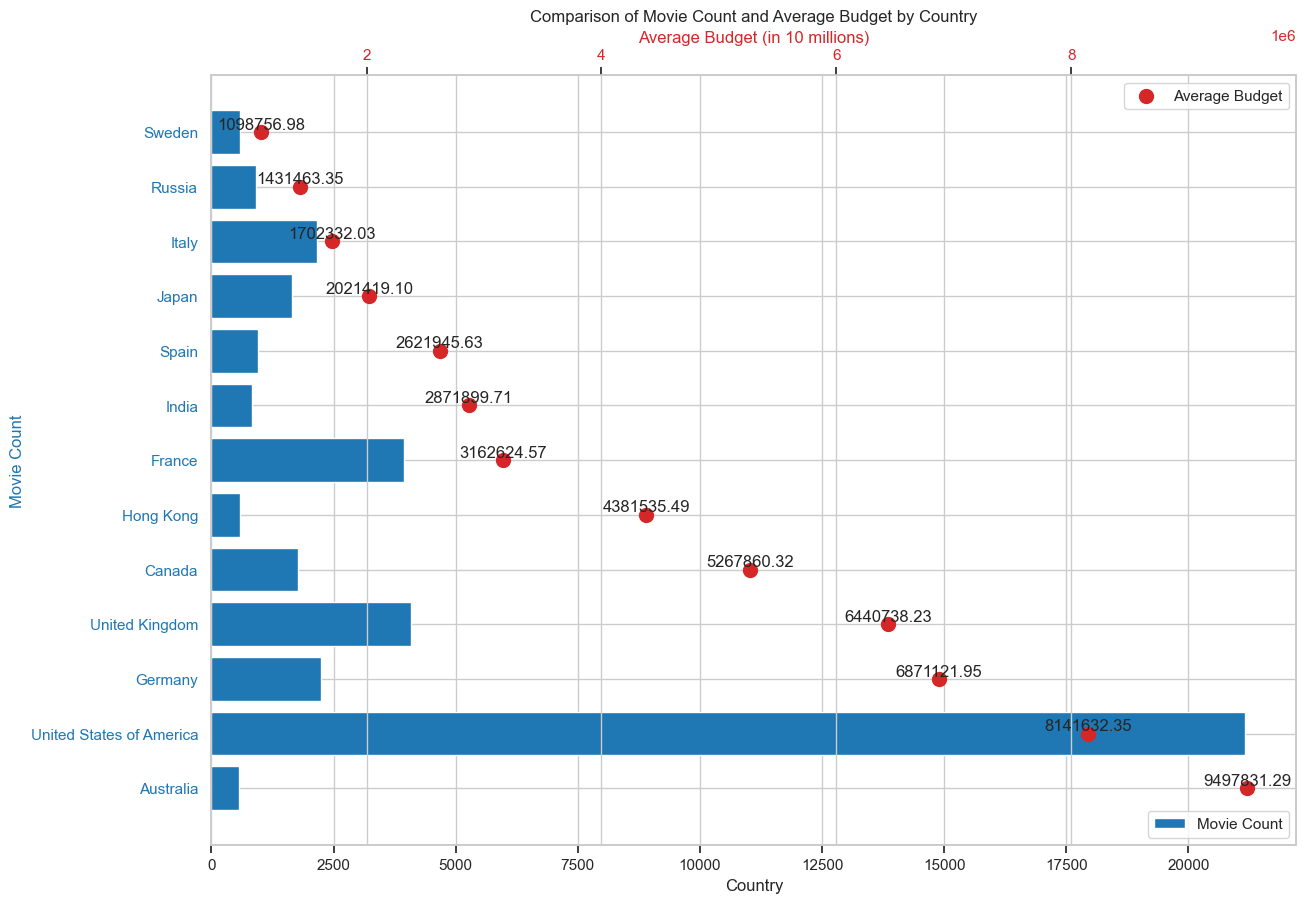

In [147]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 10))

# Set up the bar plot for movie counts
color = 'tab:blue'
ax1.set_xlabel('Country')
ax1.set_ylabel('Movie Count', color=color)
bars = ax1.barh(sorted_country_stats_budget['country'], sorted_country_stats_budget['movie_count'], color=color, label='Movie Count')
ax1.tick_params(axis='y', labelcolor=color)


# Set up the scatter plot for average budget
ax2 = ax1.twiny()
color = 'tab:red'
ax2.set_xlabel('Average Budget (in 10 millions)', color=color)
scatter = ax2.scatter(sorted_country_stats_budget['average_budget'], sorted_country_stats_budget['country'], color=color, label='Average Budget', s=100)
ax2.tick_params(axis='x', labelcolor=color)

# Add average budget as text above the scatter points
for i, (avg_budget, country) in enumerate(zip(sorted_country_stats_budget['average_budget'], sorted_country_stats_budget['country'])):
    ax2.text(avg_budget, 
             country, 
             f'{avg_budget:.2f}', 
             va='bottom', 
             ha='center')

# Update legends
ax1.legend([bars], ['Movie Count'], loc='lower right')
ax2.legend(['Average Budget'], loc='upper right')

plt.title('Comparison of Movie Count and Average Budget by Country')
plt.show()


We can see that even though the United States produces the most films, their average production cost is still not the highest. 

The average cost of making a film in Australia is about $9.5 million, and the revenue is about $20.5 million, making it the country with the highest film production costs in the world. 

In contrast, the United States has the highest average revenue per film worldwide, with an average revenue of $22.52 million per film and an average production cost of about $8.14 million. This might be a little-known fact because Australia's film industry isn't very well-known.

#### What is the most successful Franchise?

In [175]:
df_fran = df[df['belongs_to_collection'].notnull()]
df_fran['belongs_to_collection'] = df_fran['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)
df_fran = df_fran[df_fran['belongs_to_collection'].notnull()]

fran_pivot = df_fran.pivot_table(index='belongs_to_collection', values='revenue', aggfunc={'revenue': ['mean', 'sum', 'count']}).reset_index()

fran_pivot.sort_values('sum', ascending=False).head(10)

belongs_to_collection  count          mean           sum
552               Harry Potter Collection      8  9.634209e+08  7.707367e+09
1160                 Star Wars Collection      8  9.293118e+08  7.434495e+09
646                 James Bond Collection     26  2.733450e+08  7.106970e+09
1317  The Fast and the Furious Collection      8  6.406373e+08  5.125099e+09
968   Pirates of the Caribbean Collection      5  9.043154e+08  4.521577e+09
1550              Transformers Collection      5  8.732202e+08  4.366101e+09
325              Despicable Me Collection      6  6.151784e+08  3.691070e+09
1491              The Twilight Collection      5  6.684215e+08  3.342107e+09
610                    Ice Age Collection      5  6.433417e+08  3.216709e+09
666              Jurassic Park Collection      4  7.578710e+08  3.031484e+09

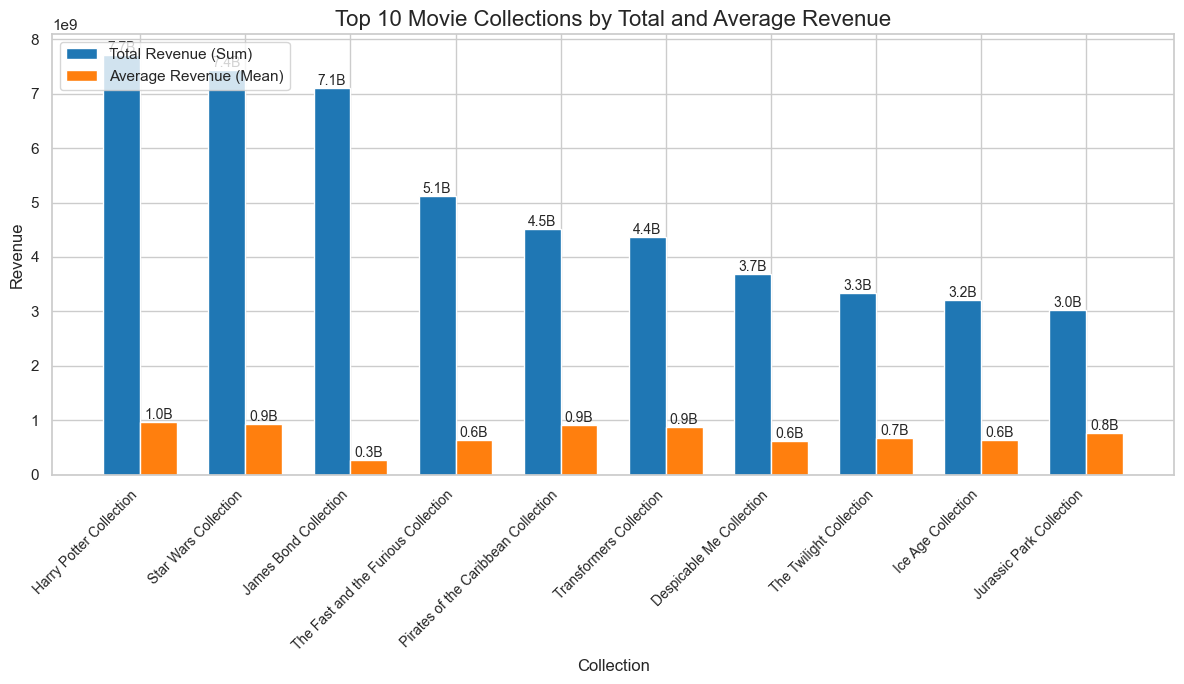

In [170]:

collection = [
    'Harry Potter Collection', 'Star Wars Collection', 'James Bond Collection',
    'The Fast and the Furious Collection', 'Pirates of the Caribbean Collection',
    'Transformers Collection', 'Despicable Me Collection', 'The Twilight Collection',
    'Ice Age Collection', 'Jurassic Park Collection'
]
mean_values = [9.634209e+08, 9.293118e+08, 2.733450e+08, 6.406373e+08, 9.043154e+08,
               8.732202e+08, 6.151784e+08, 6.684215e+08, 6.433417e+08, 7.578710e+08]
sum_values = [7.707367e+09, 7.434495e+09, 7.106970e+09, 5.125099e+09, 4.521577e+09,
              4.366101e+09, 3.691070e+09, 3.342107e+09, 3.216709e+09, 3.031484e+09]
count_values = [8, 8, 26, 8, 5, 5, 6, 5, 5, 4]

fig, ax1 = plt.subplots(figsize=(12, 7))

# Bar width and positions
bar_width = 0.35
index = np.arange(len(collection))

# Plot bars for sum_values
bars1 = ax1.bar(index, sum_values, bar_width, color='tab:blue', label='Total Revenue (Sum)')

# Plot bars for mean_values
bars2 = ax1.bar(index + bar_width, mean_values, bar_width, color='tab:orange', label='Average Revenue (Mean)')

# Set axis labels and title
ax1.set_xlabel('Collection', fontsize=12)
ax1.set_ylabel('Revenue', fontsize=12)
ax1.set_title('Top 10 Movie Collections by Total and Average Revenue', fontsize=16)

# Set x-axis tick labels
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(collection, rotation=45, ha='right', fontsize=10)

# Annotate bars with sum and mean values
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval/1e9:.1f}B', ha='center', va='bottom', fontsize=10)
for bar in bars2:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval/1e9:.1f}B', ha='center', va='bottom', fontsize=10)

# Add a legend
ax1.legend(loc='upper left')

# Adjust layout to prevent clipping of tick labels
fig.tight_layout()

# Show the plot
plt.show()


Among the top 10 movie collections by revenue, the **Harry Potter Collection** stands out as the highest-grossing franchise, amassing an impressive total revenue of $7.71 billion across 8 movies, averaging $963.4 million per film. On the other end of the spectrum, the **Jurassic Park Collection** ranks as the lowest-grossing among the top 10, generating $3.03 billion from 4 movies, with an average revenue of $757.9 million per film.

Notably, the **James Bond Collection** is the most prolific, with 26 movies contributing to a significant total revenue of $7.11 billion. Despite this vast output, the collection's average revenue per movie sits at a comparatively modest $273.3 million.

In [176]:
fran_pivot.sort_values('mean', ascending=False).head(10)

belongs_to_collection  count          mean           sum
1245              The Avengers Collection      2  1.462481e+09  2.924962e+09
112                     Avatar Collection      2  1.393983e+09  2.787965e+09
446               Finding Nemo Collection      2  9.844532e+08  1.968906e+09
1352                The Hobbit Collection      3  9.785078e+08  2.935523e+09
1388     The Lord of the Rings Collection      3  9.721816e+08  2.916545e+09
552               Harry Potter Collection      8  9.634209e+08  7.707367e+09
1160                 Star Wars Collection      8  9.293118e+08  7.434495e+09
968   Pirates of the Caribbean Collection      5  9.043154e+08  4.521577e+09
1457   The Secret Life of Pets Collection      1  8.754579e+08  8.754579e+08
1550              Transformers Collection      5  8.732202e+08  4.366101e+09

Among these film franchises, when comparing the average revenue per film, The **Avengers Collection** tops the list with a staggering average of $1.4625 billion per film, showcasing its extraordinary global appeal. In contrast, the **Transformers Collection** series ranks at the bottom with an average revenue of $873.22 million per film, still a respectable performance despite being at the lower end. 

Other notable franchises include **Avatar Collection** and **Finding Nemo Collection**, both maintaining strong average revenues. It's worth noting that despite both containing eight films, the **Harry Potter Collection** and **Star Wars Collection** franchises still boast average revenues of over $900 million, further cementing their enduring appeal among audiences.

In [177]:
fran_pivot = df_fran.pivot_table(index='belongs_to_collection', values='budget', aggfunc={'budget': ['mean', 'sum', 'count']}).reset_index()

fran_pivot.sort_values('sum', ascending=False).head(10)

belongs_to_collection  count          mean           sum
646                 James Bond Collection     26  5.921731e+07  1.539650e+09
552               Harry Potter Collection      8  1.600000e+08  1.280000e+09
968   Pirates of the Caribbean Collection      5  2.500000e+08  1.250000e+09
1317  The Fast and the Furious Collection      8  1.261250e+08  1.009000e+09
1656                     X-Men Collection      6  1.638333e+08  9.830000e+08
1550              Transformers Collection      5  1.930000e+08  9.650000e+08
1160                 Star Wars Collection      8  1.067938e+08  8.543500e+08
1352                The Hobbit Collection      3  2.500000e+08  7.500000e+08
1483            The Terminator Collection      5  1.322800e+08  6.614000e+08
835        Mission: Impossible Collection      5  1.300000e+08  6.500000e+08

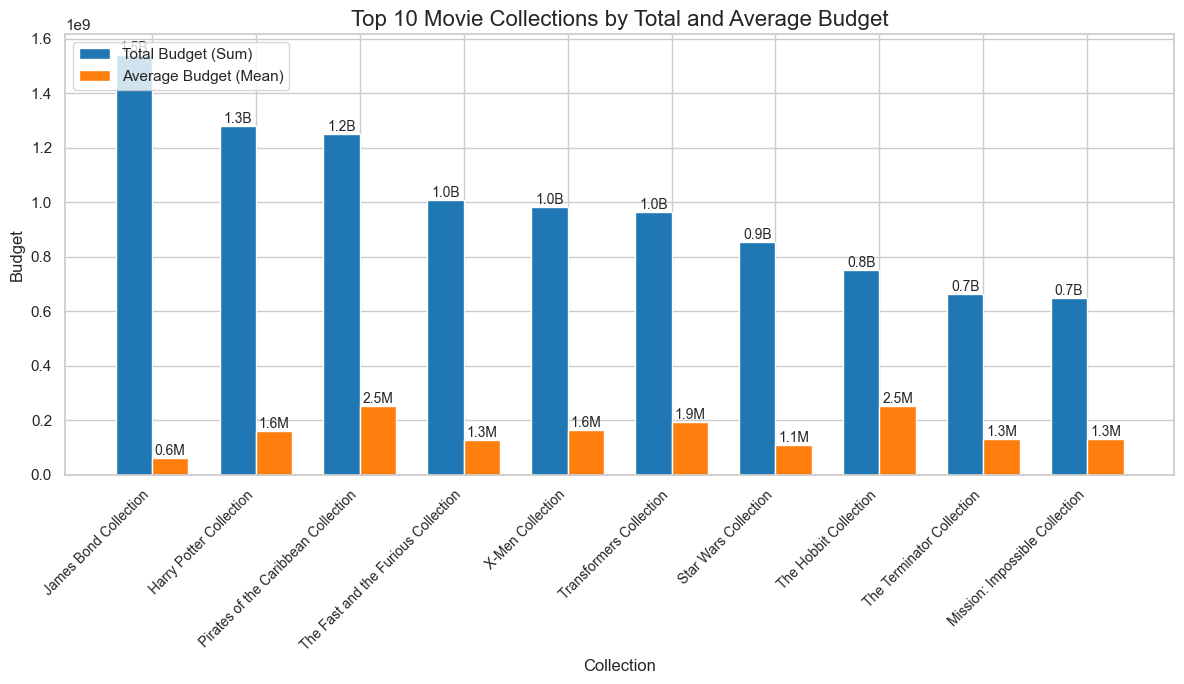

In [173]:

collection_budget = [
    'James Bond Collection', 'Harry Potter Collection', 'Pirates of the Caribbean Collection',
    'The Fast and the Furious Collection', 'X-Men Collection', 'Transformers Collection',
    'Star Wars Collection', 'The Hobbit Collection', 'The Terminator Collection',
    'Mission: Impossible Collection'
]
mean_budget_values = [5.921731e+07, 1.600000e+08, 2.500000e+08, 1.261250e+08,
                      1.638333e+08, 1.930000e+08, 1.067938e+08, 2.500000e+08,
                      1.322800e+08, 1.300000e+08]
sum_budget_values = [1.539650e+09, 1.280000e+09, 1.250000e+09, 1.009000e+09,
                     9.830000e+08, 9.650000e+08, 8.543500e+08, 7.500000e+08,
                     6.614000e+08, 6.500000e+08]
count_budget_values = [26, 8, 5, 8, 6, 5, 8, 3, 5, 5]


fig, ax1 = plt.subplots(figsize=(12, 7))


bar_width = 0.35
index = np.arange(len(collection_budget))


bars1 = ax1.bar(index, sum_budget_values, bar_width, color='tab:blue', label='Total Budget (Sum)')

bars2 = ax1.bar(index + bar_width, mean_budget_values, bar_width, color='tab:orange', label='Average Budget (Mean)')

ax1.set_xlabel('Collection', fontsize=12)
ax1.set_ylabel('Budget', fontsize=12)
ax1.set_title('Top 10 Movie Collections by Total and Average Budget', fontsize=16)

ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(collection_budget, rotation=45, ha='right', fontsize=10)

for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval/1e9:.1f}B', ha='center', va='bottom', fontsize=10)
for bar in bars2:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval/1e8:.1f}M', ha='center', va='bottom', fontsize=10)

ax1.legend(loc='upper left')

fig.tight_layout()

plt.show()


In terms of production budgets, the **Pirates of the Caribbean Collection** claims the title of the most lavish, with an average budget of $250 million per movie across 5 films, culminating in a total budget of $1.25 billion. Meanwhile, the **James Bond Collection** showcases efficiency, maintaining an average budget of just $59.2 million per movie across its 26-film lineup, resulting in a total production budget of $1.54 billion.

The collection with the largest overall budget is, unsurprisingly, the **James Bond Collection**, with a cumulative production cost of $1.54 billion. In contrast, the **Mission: Impossible Collection** operates with a more conservative budget, totaling $650 million across 5 movies.

In [178]:
fran_pivot.sort_values('mean', ascending=False).head(10)

belongs_to_collection  count          mean           sum
1245              The Avengers Collection      2  2.500000e+08  5.000000e+08
968   Pirates of the Caribbean Collection      5  2.500000e+08  1.250000e+09
1352                The Hobbit Collection      3  2.500000e+08  7.500000e+08
798               Man of Steel Collection      2  2.375000e+08  4.750000e+08
1234    The Amazing Spider-Man Collection      2  2.075000e+08  4.150000e+08
1651               World War Z Collection      1  2.000000e+08  2.000000e+08
1146                Spider-Man Collection      3  1.990000e+08  5.970000e+08
1290           The Dark Knight Collection      3  1.950000e+08  5.850000e+08
1550              Transformers Collection      5  1.930000e+08  9.650000e+08
221            Captain America Collection      3  1.866667e+08  5.600000e+08

#### What's the most profitable genre?

When it comes to movie genres, everyone has different preferences. But we wanted to do some analysis to find a relationship between the genre of movies and their commercial success.

In [190]:
def extract_genres(genres_str):
    try:
        genres_list = json.loads(genres_str.replace("'", "\""))
        return ', '.join([genre['name'] for genre in genres_list])
    except:
        return None
movie_data['parsed_genres'] = movie_data['genres'].apply(extract_genres)
movie_data['primary_genre'] = movie_data['parsed_genres'].apply(lambda x: x.split(',')[0] if x else None)
genre_financials = movie_data.groupby('primary_genre')[['budget', 'revenue']].mean().dropna()
genre_counts = movie_data['primary_genre'].value_counts()
genre_financials['count'] = genre_counts
genre_financials.dropna(inplace=True)
sorted_genres_by_revenue = genre_financials.sort_values('revenue', ascending=False)
sorted_genres_by_budget = genre_financials.sort_values('budget', ascending=False)



Let’s first take a look at the proportion distribution of all movie genre in our data set.

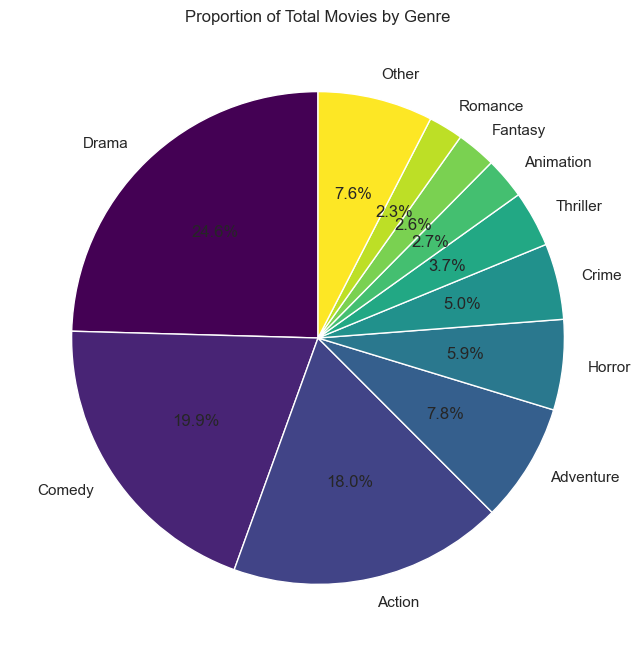

In [193]:
plt.figure(figsize=(8, 8))
small_genres = genre_counts[genre_counts / genre_counts.sum() * 100 < 2]
other_sum = small_genres.sum()
genre_counts = genre_counts[genre_counts / genre_counts.sum() * 100 >= 2]
genre_counts['Other'] = other_sum
genre_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Proportion of Total Movies by Genre')
plt.ylabel('')
plt.show()

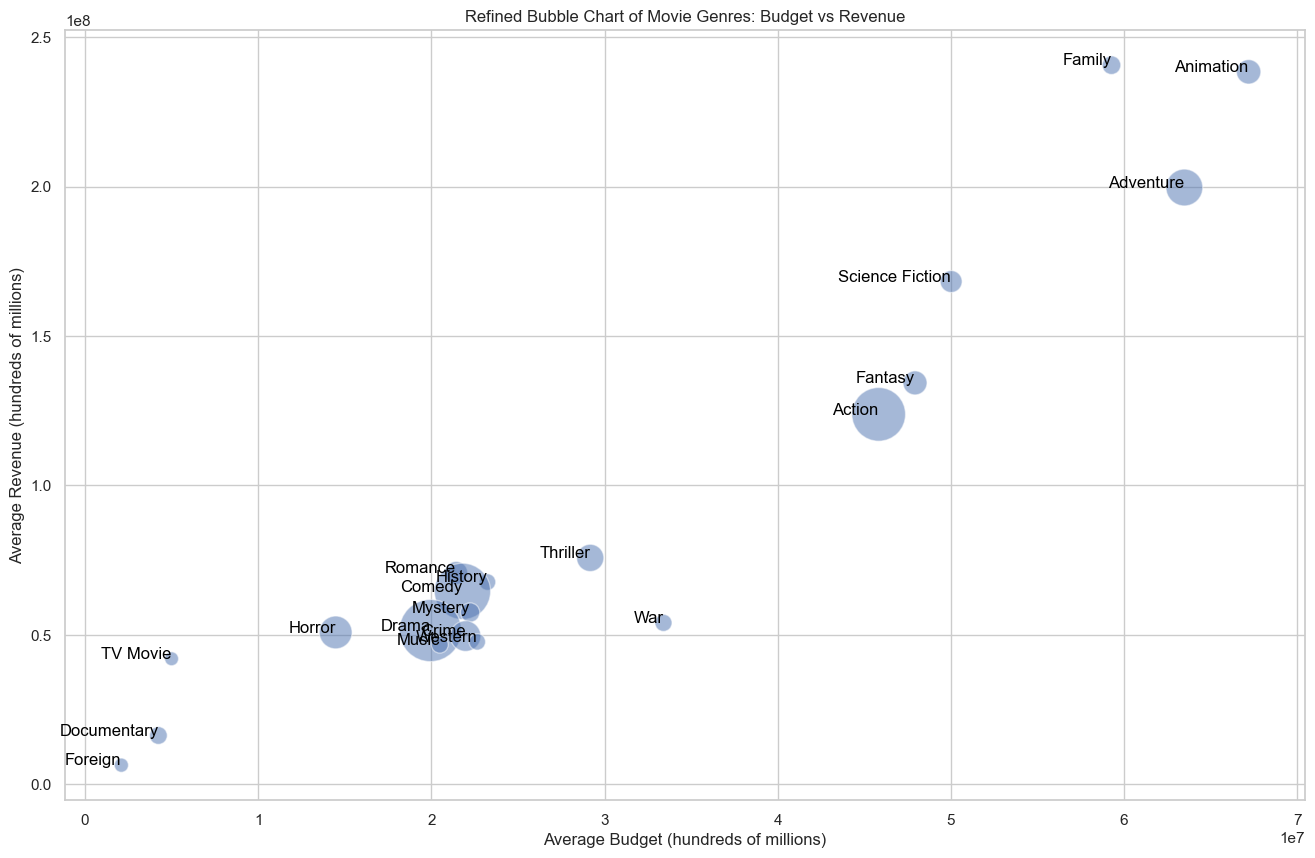

In [191]:
plt.figure(figsize=(16, 10))
bubble_plot = sns.scatterplot(data=sorted_genres_by_revenue, x='budget', y='revenue', size='count', legend=False, sizes=(100, 2000), alpha=0.5)
plt.title('Refined Bubble Chart of Movie Genres: Budget vs Revenue')
plt.xlabel('Average Budget (hundreds of millions)')
plt.ylabel('Average Revenue (hundreds of millions)')
plt.grid(True)
for index, row in sorted_genres_by_revenue.iterrows():
    bubble_plot.text(row['budget'], row['revenue'], index, color='black', ha='right')
plt.show()

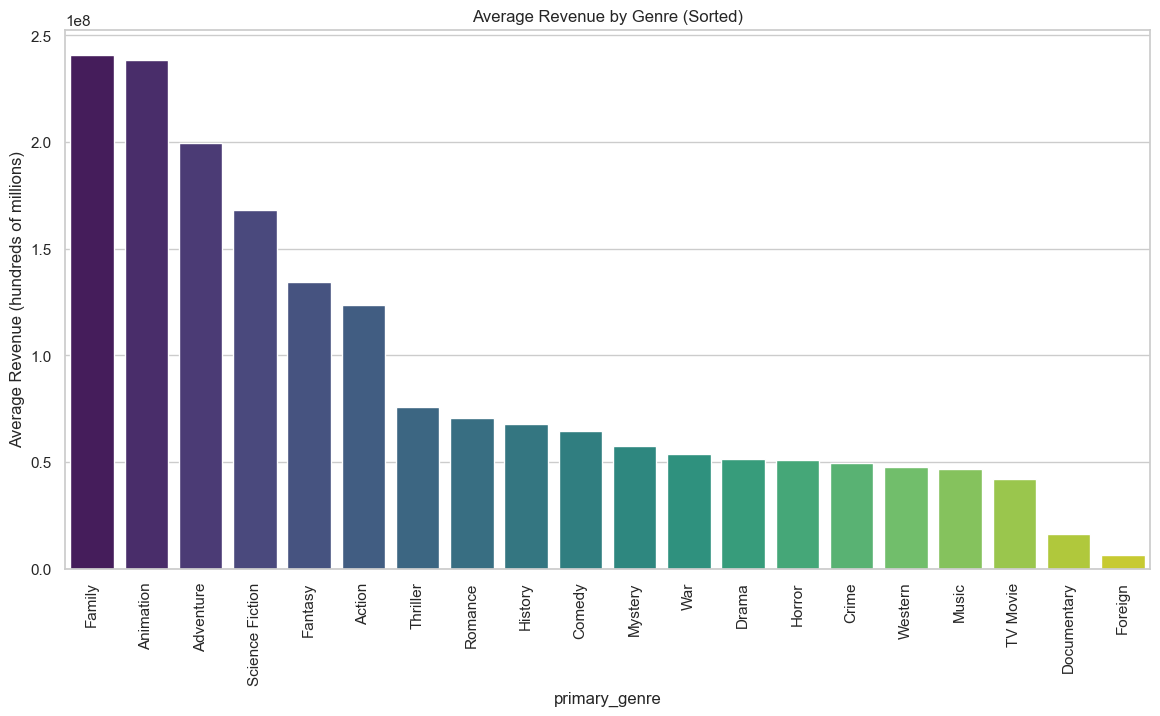

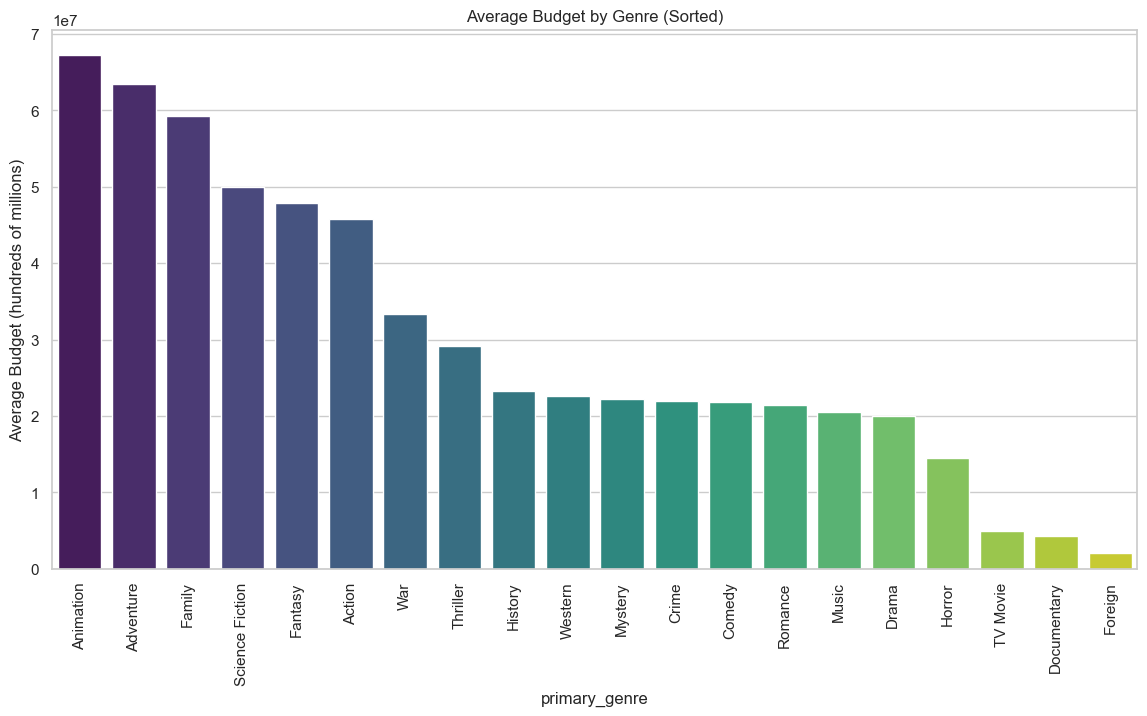

In [192]:
plt.figure(figsize=(14, 7))
sns.barplot(x=sorted_genres_by_revenue.index, y='revenue', data=sorted_genres_by_revenue, palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Revenue by Genre (Sorted)')
plt.ylabel('Average Revenue (hundreds of millions)')
plt.show()


plt.figure(figsize=(14, 7))
sns.barplot(x=sorted_genres_by_budget.index, y='budget', data=sorted_genres_by_budget, palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Budget by Genre (Sorted)')
plt.ylabel('Average Budget (hundreds of millions)')
plt.show()

#### Do votes matter?

Although we may already know that a commercially successful film will not necessarily receive higher ratings from audiences, and vice versa. But we still want to thoroughly explore how much connection a movie's score has with its commercial success?

In [220]:
movie_data['parsed_genres'] = movie_data['genres'].apply(extract_genres)
movie_data['primary_genre'] = movie_data['parsed_genres'].apply(lambda x: x.split(',')[0] if x else None)

def extract_genres(genres_str):
    try:
        genres_list = json.loads(genres_str.replace("'", "\""))
        return ', '.join([genre['name'] for genre in genres_list])
    except:
        return None

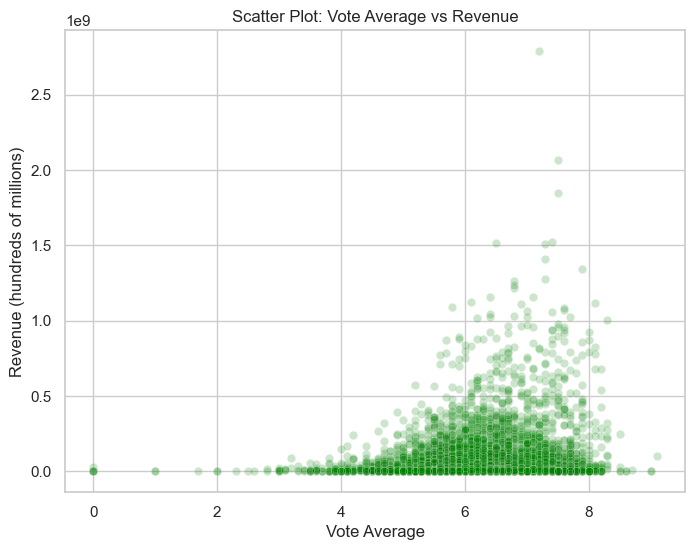

In [219]:
plt.figure(figsize=(8, 6))
scatter_revenue = sns.scatterplot(data=movie_data, x='vote_average', y='revenue', alpha=0.2, color='green')
plt.title('Scatter Plot: Vote Average vs Revenue')
plt.xlabel('Vote Average')
plt.ylabel('Revenue (hundreds of millions)')
plt.show()

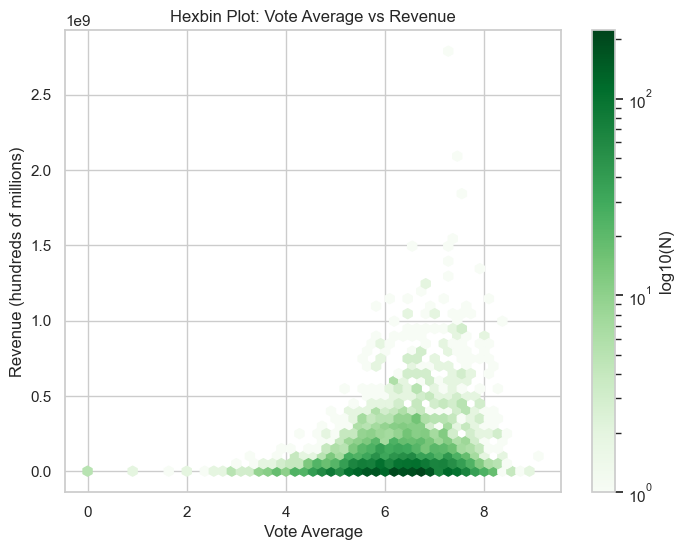

In [207]:
plt.figure(figsize=(8, 6))
plt.hexbin(movie_data['vote_average'], movie_data['revenue'], gridsize=50, cmap='Greens', bins='log')
plt.colorbar(label='log10(N)')
plt.title('Hexbin Plot: Vote Average vs Revenue')
plt.xlabel('Vote Average')
plt.ylabel('Revenue (hundreds of millions)')
plt.show()

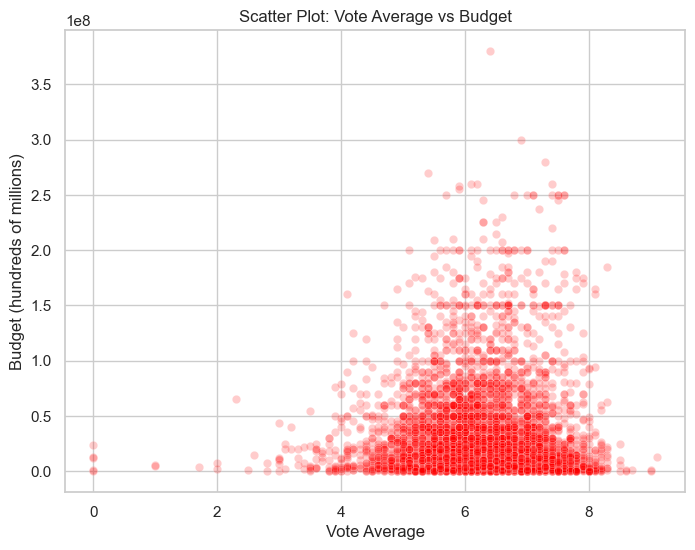

In [213]:
# Scatter Plot for Vote Average vs Budget
plt.figure(figsize=(8, 6))
scatter_budget = sns.scatterplot(data=movie_data, x='vote_average', y='budget', alpha=0.2, color='red')
plt.title('Scatter Plot: Vote Average vs Budget')
plt.xlabel('Vote Average')
plt.ylabel('Budget (hundreds of millions)')
plt.show()

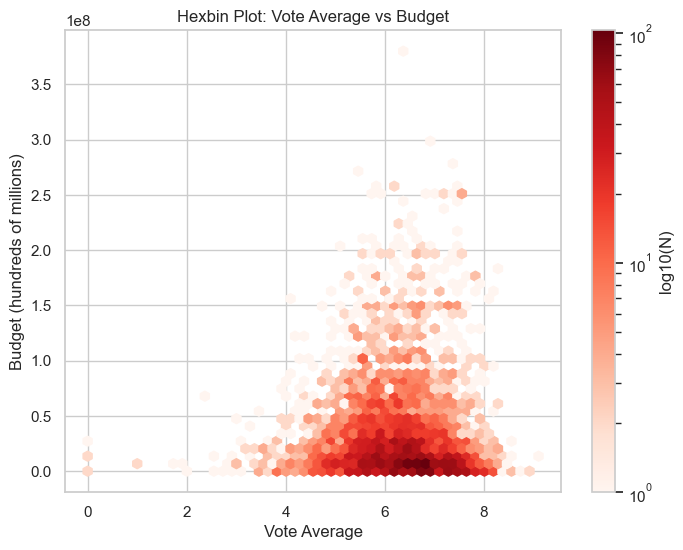

In [204]:
plt.figure(figsize=(8, 6))
plt.hexbin(movie_data['vote_average'], movie_data['budget'], gridsize=50, cmap='Reds', bins='log')
plt.colorbar(label='log10(N)')
plt.title('Hexbin Plot: Vote Average vs Budget')
plt.xlabel('Vote Average')
plt.ylabel('Budget (hundreds of millions)')
plt.show()

## Genre

## Visualizations

## Discussion

## Contributions